# **Line Charts**


## Objectives


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


#### Step 1: Download the dataset


In [ ]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


--2025-05-05 11:59:41--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  37.5MB/s    in 4.6s    

2025-05-05 11:59:46 (33.0 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



#### Step 2: Import necessary libraries and load the dataset


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


#### Load the data


In [ ]:
df = pd.read_csv("survey-data.csv")


#### Display the first few rows to understand the structure of the data


In [ ]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


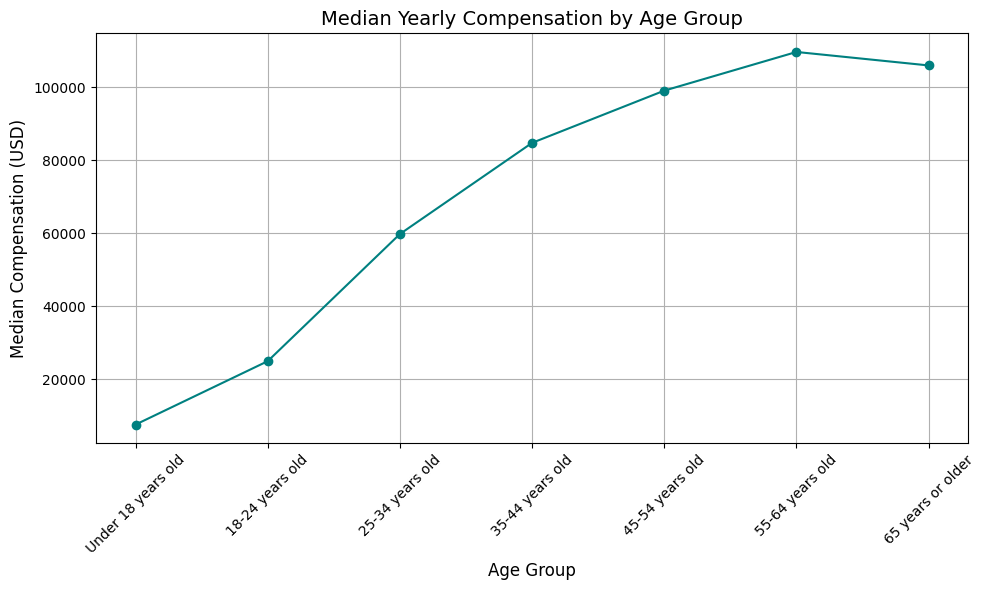

In [ ]:
## Write your code here
# Define a logical order for age groups
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old',
             '35-44 years old', '45-54 years old', '55-64 years old',
             '65 years or older']

# Filter valid data (drop NaNs and keep only rows with valid age groups)
df_filtered = df[df['Age'].isin(age_order)].copy()

# Group by Age and calculate median compensation
comp_by_age = df_filtered.groupby('Age')['ConvertedCompYearly'].median().reindex(age_order)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(comp_by_age.index, comp_by_age.values, marker='o', linestyle='-', color='teal')

plt.title('Median Yearly Compensation by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Median Compensation (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


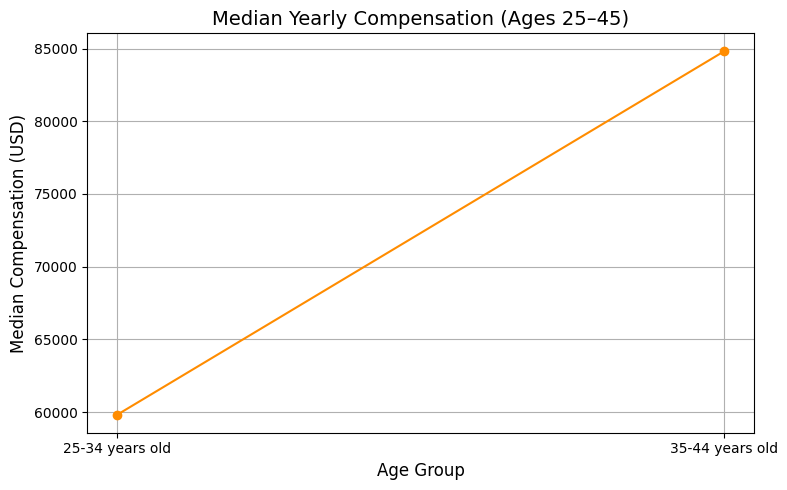

In [ ]:
## Write your code here
# Define age groups for 25 to 45 range
target_age_groups = ['25-34 years old', '35-44 years old']

# Filter dataset to include only those age groups
df_filtered = df[df['Age'].isin(target_age_groups)].copy()

# Group by age and calculate median compensation
median_comp = df_filtered.groupby('Age')['ConvertedCompYearly'].median().reindex(target_age_groups)

# Plotting the line chart
plt.figure(figsize=(8, 5))
plt.plot(median_comp.index, median_comp.values, marker='o', linestyle='-', color='darkorange')

plt.title('Median Yearly Compensation (Ages 25–45)', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Median Compensation (USD)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


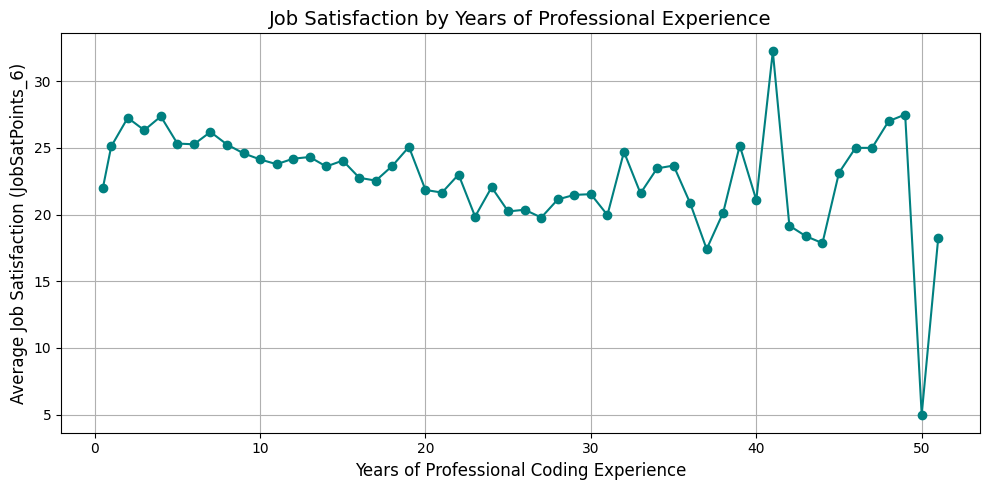

In [ ]:
## Write your code here
# Replace non-numeric entries
def clean_experience(val):
    if val == "Less than 1 year":
        return 0.5
    elif val == "More than 50 years":
        return 51
    else:
        try:
            return float(val)
        except:
            return None

# Clean the 'YearsCodePro' column
df['YearsCodeProClean'] = df['YearsCodePro'].apply(clean_experience)

# Drop missing values
df_exp = df.dropna(subset=['YearsCodeProClean', 'JobSatPoints_6'])

# Group by experience and calculate average satisfaction
avg_satisfaction_by_exp = df_exp.groupby('YearsCodeProClean')['JobSatPoints_6'].mean()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(avg_satisfaction_by_exp.index, avg_satisfaction_by_exp.values, marker='o', color='teal')

plt.title('Job Satisfaction by Years of Professional Experience', fontsize=14)
plt.xlabel('Years of Professional Coding Experience', fontsize=12)
plt.ylabel('Average Job Satisfaction (JobSatPoints_6)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


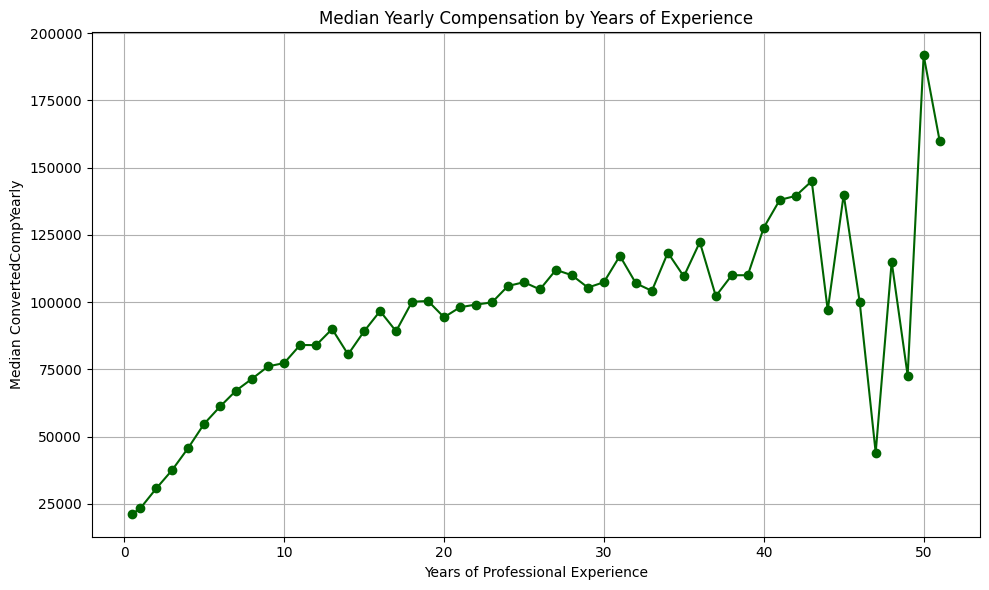

In [ ]:
## Write your code here
# Clean experience values
def clean_experience(val):
    if val == "Less than 1 year":
        return 0.5
    elif val == "More than 50 years":
        return 51
    try:
        return float(val)
    except:
        return None

# Apply cleaning to YearsCodePro column
df['YearsCodeProClean'] = df['YearsCodePro'].apply(clean_experience)

# Filter out rows with missing or invalid compensation/experience
df_clean = df.dropna(subset=['YearsCodeProClean', 'ConvertedCompYearly'])

# Group by experience and calculate median compensation
median_comp_by_exp = df_clean.groupby('YearsCodeProClean')['ConvertedCompYearly'].median()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(median_comp_by_exp.index, median_comp_by_exp.values, color='darkgreen', marker='o')
plt.title('Median Yearly Compensation by Years of Experience')
plt.xlabel('Years of Professional Experience')
plt.ylabel('Median ConvertedCompYearly')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


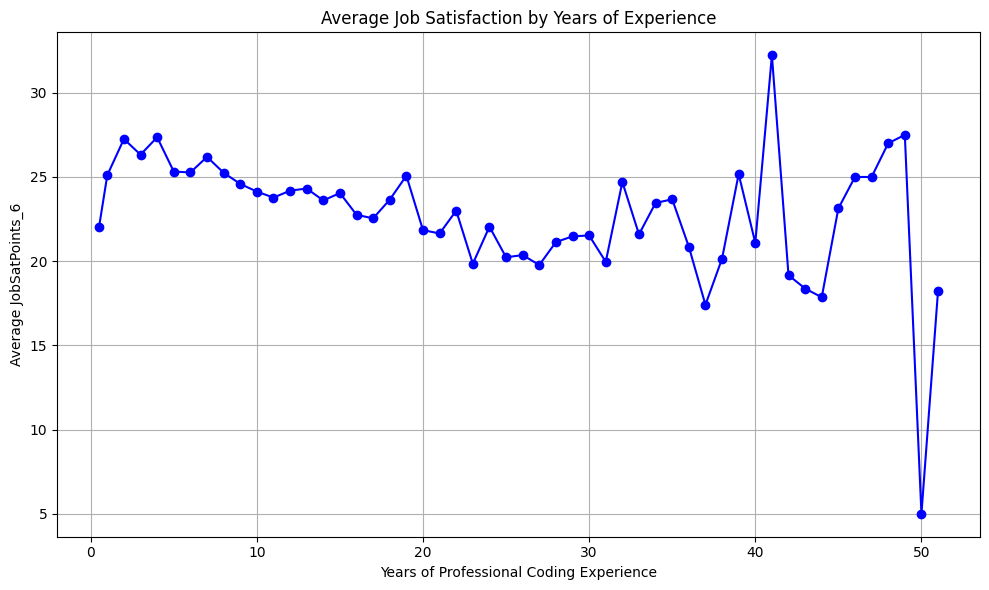

In [ ]:
## Write your code here
# Function to clean YearsCodePro values
def clean_exp(val):
    if val == "Less than 1 year":
        return 0.5
    elif val == "More than 50 years":
        return 51
    try:
        return float(val)
    except:
        return None

# Clean the data
df['YearsCodeProClean'] = df['YearsCodePro'].apply(clean_exp)
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Drop NaNs
df_clean = df.dropna(subset=['YearsCodeProClean', 'JobSatPoints_6'])

# Group by experience and calculate average job satisfaction
satisfaction_by_exp = df_clean.groupby('YearsCodeProClean')['JobSatPoints_6'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(satisfaction_by_exp.index, satisfaction_by_exp.values, color='blue', marker='o')
plt.title('Average Job Satisfaction by Years of Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Average JobSatPoints_6')
plt.grid(True)
plt.tight_layout()
plt.show()